In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [3]:
data=pd.read_csv('/content/netflix1.csv')

In [4]:
print(data.head(5))

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
data.shape

(8790, 10)

In [8]:
data=data.drop_duplicates()

In [9]:
data['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


<ipython-input-10-2a065f417fc4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', ax=axes[0],palette=['skyblue','red'])


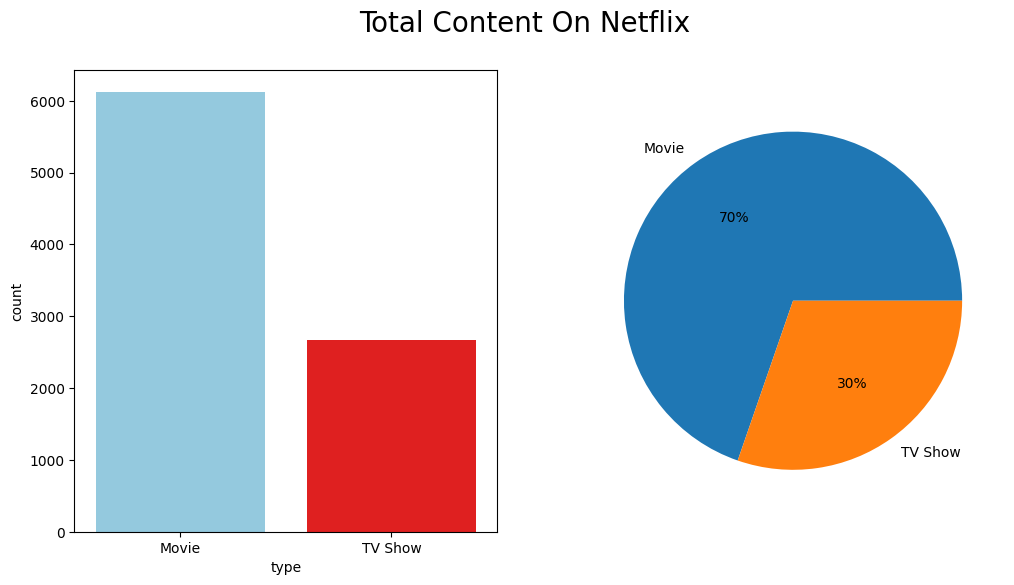

In [10]:
freq=data['type'].value_counts()

fig, axes=plt.subplots(1,2, figsize=(12,6))

sns.countplot(data=data, x='type', ax=axes[0],palette=['skyblue','red'])
plt.pie(freq, labels=['Movie','TV Show'], autopct='%.0f%%')

plt.suptitle('Total Content On Netflix', fontsize=20)
plt.show()


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [12]:
ratings=data['rating'].value_counts().reset_index()
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


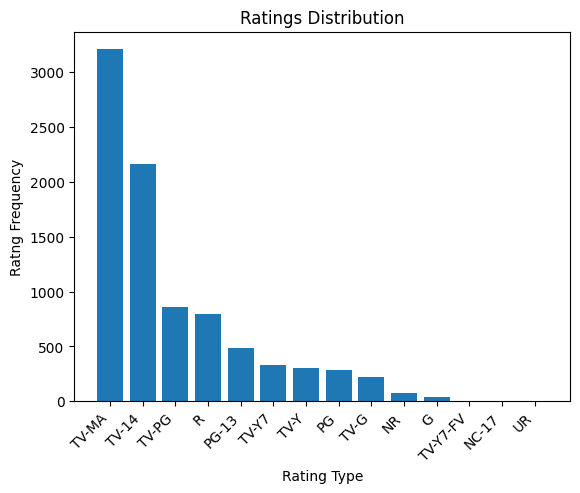

In [13]:
plt.bar(ratings['rating'],ratings['count'])
plt.xticks(rotation=45 , ha='right')
plt.xlabel('Rating Type')
plt.ylabel('Ratng Frequency')
plt.title('Ratings Distribution')
plt.show()

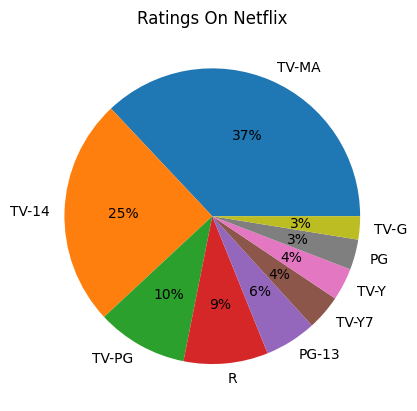

In [14]:
plt.pie(ratings['count'][:9] , labels=ratings['rating'][:9], autopct='%.0f%%')
plt.title('Ratings On Netflix')
plt.show()

In [16]:
data['date_added']=pd.to_datetime(data['date_added'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [17]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [20]:
data['country'].value_counts()

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Iran,1
West Germany,1
Greece,1


In [25]:
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count',ascending=False)
top_ten_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
...,...,...
71,Puerto Rico,1
70,Cyprus,1
69,Somalia,1
68,Paraguay,1


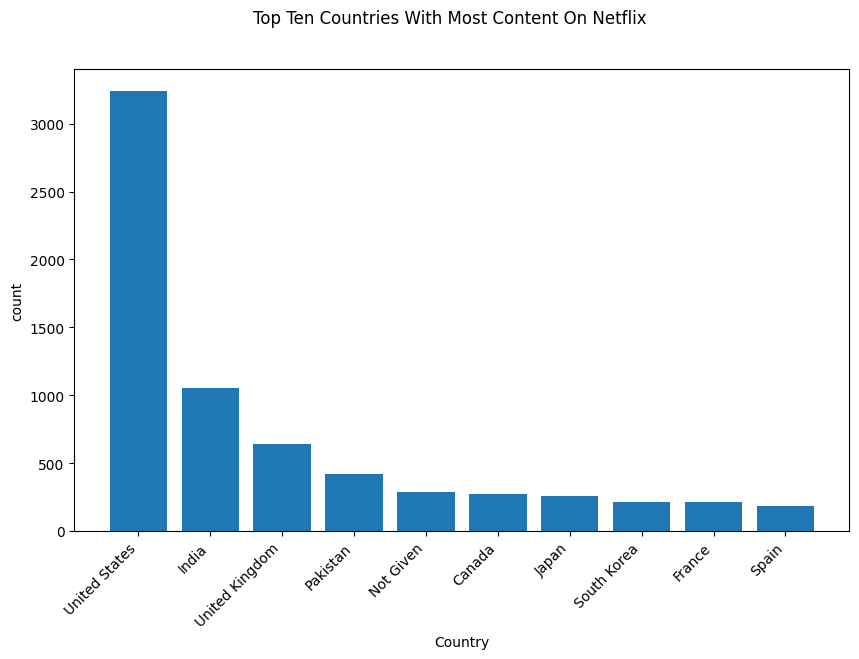

In [40]:
plt.figure(figsize=(10,6))
plt.bar(top_ten_countries['country'][:10],top_ten_countries['count'][:10])
plt.xticks(rotation=45 , ha='right')
plt.suptitle('Top Ten Countries With Most Content On Netflix')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

In [42]:
data['Year']=data['date_added'].dt.year
data['Month']=data['date_added'].dt.month
data['Day']=data['date_added'].dt.day

In [58]:
monthly_movie_release=data[data['type']=='Movie']['Month'].value_counts().sort_index()
monthly_movie_release


,count
Month,
1,545
2,382
3,528
4,549
5,439
6,492
7,565
8,518
9,518


In [59]:
monthly_series_release=data[data['type']=='TV Show']['Month'].value_counts().sort_index()
monthly_series_release

,count
Month,
1,192
2,180
3,213
4,214
5,193
6,236
7,262
8,236
9,251


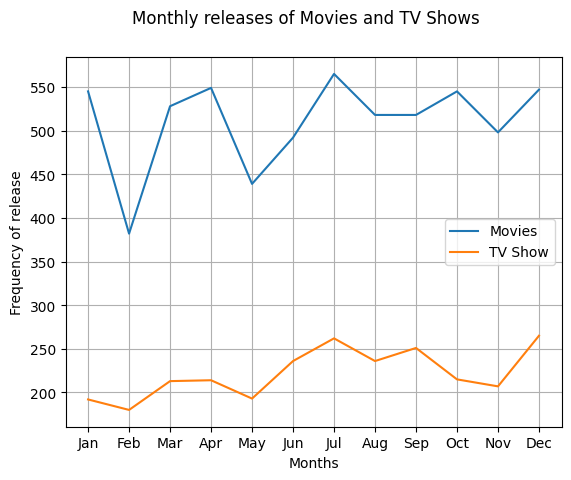

In [84]:
plt.plot(monthly_movie_release.index , monthly_movie_release.values , label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values, label='TV Show')
plt.xlabel('Months')
plt.ylabel('Frequency of release')
plt.xticks(range(1,13),['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.legend()
plt.grid()
plt.suptitle('Monthly releases of Movies and TV Shows')
plt.show()

In [67]:
Yearly_movie_release=data[data['type']=='Movie']['Year'].value_counts().sort_index()
print(Yearly_movie_release)
print('\n')
Yearly_series_release=data[data['type']=='TV Show']['Year'].value_counts().sort_index()
print(Yearly_series_release)

Year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: count, dtype: int64


Year
2008      1
2013      5
2014      5
2015     26
2016    175
2017    349
2018    411
2019    592
2020    595
2021    505
Name: count, dtype: int64


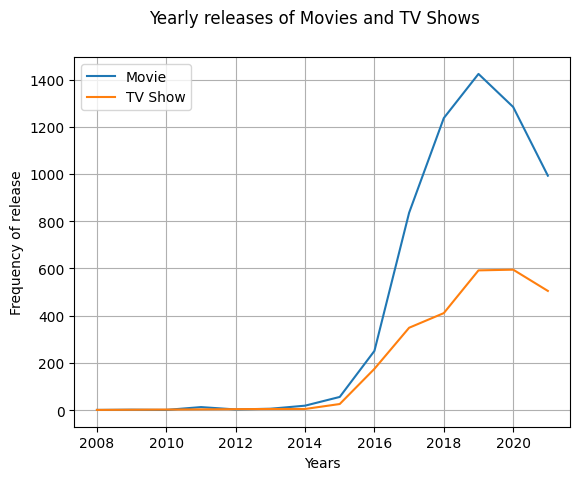

In [68]:
plt.plot(Yearly_movie_release.index ,Yearly_movie_release.values, label='Movie')
plt.plot(Yearly_series_release.index , Yearly_series_release.values, label='TV Show')
plt.xlabel('Years')
plt.ylabel('Frequency of release')
plt.legend()
plt.grid()
plt.suptitle('Yearly releases of Movies and TV Shows')
plt.show()

In [76]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
print(popular_movie_genre)
print('\n')

popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
print(popular_series_genre)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
dtype: int64


listed_in
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic 

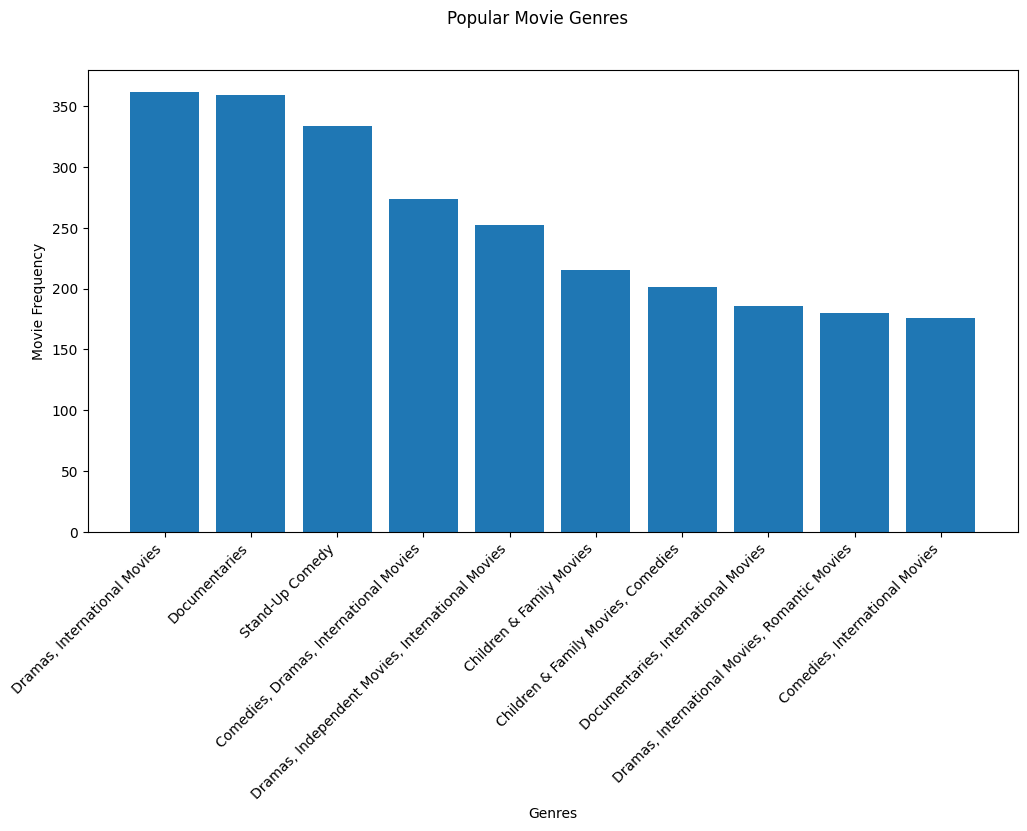

In [81]:
plt.figure(figsize=(12,6))
plt.bar(popular_movie_genre.index,popular_movie_genre.values)
plt.xlabel('Genres')
plt.xticks(rotation=45 , ha='right')
plt.ylabel('Movie Frequency')
plt.suptitle('Popular Movie Genres on Netflix')
plt.show()

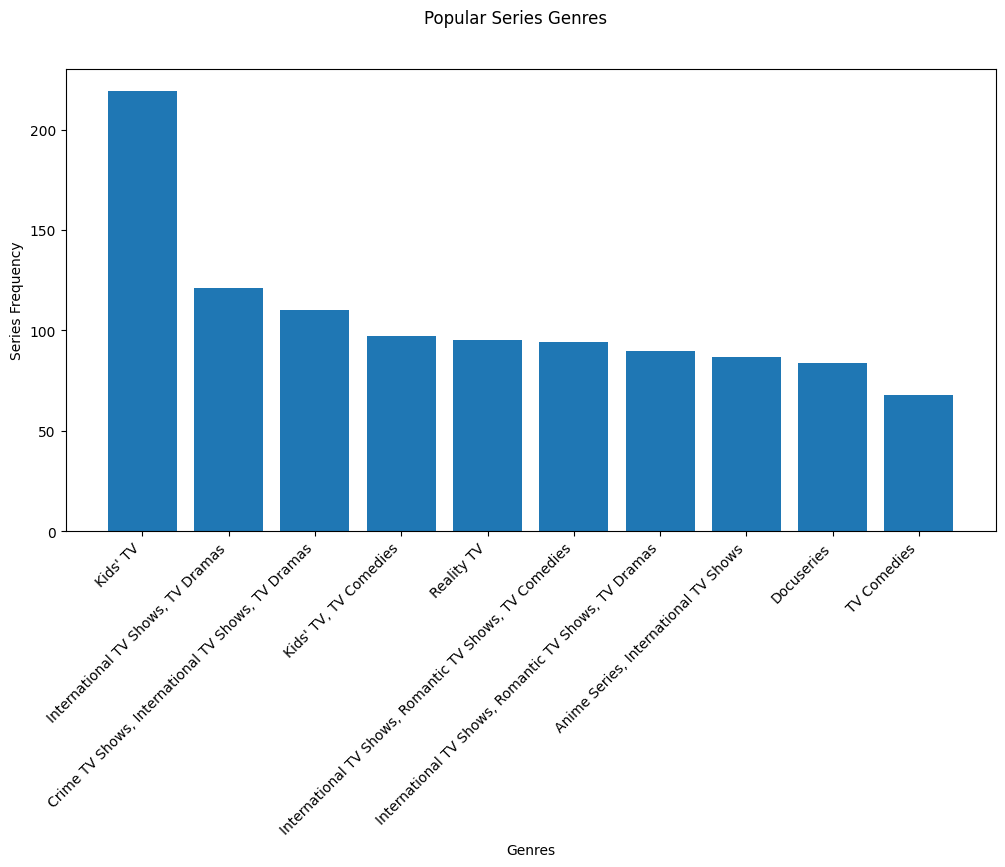

In [82]:
plt.figure(figsize=(12,6))
plt.bar(popular_series_genre.index,popular_series_genre.values)
plt.xlabel('Genres')
plt.xticks(rotation=45 , ha='right')
plt.ylabel('Series Frequency')
plt.suptitle('Popular Series Genres on Netflix')
plt.show()

In [95]:
Top_directors=data['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]
Top_directors

,director,count
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
9,Youssef Chahine,12
10,Jay Chapman,12
8,Martin Scorsese,12


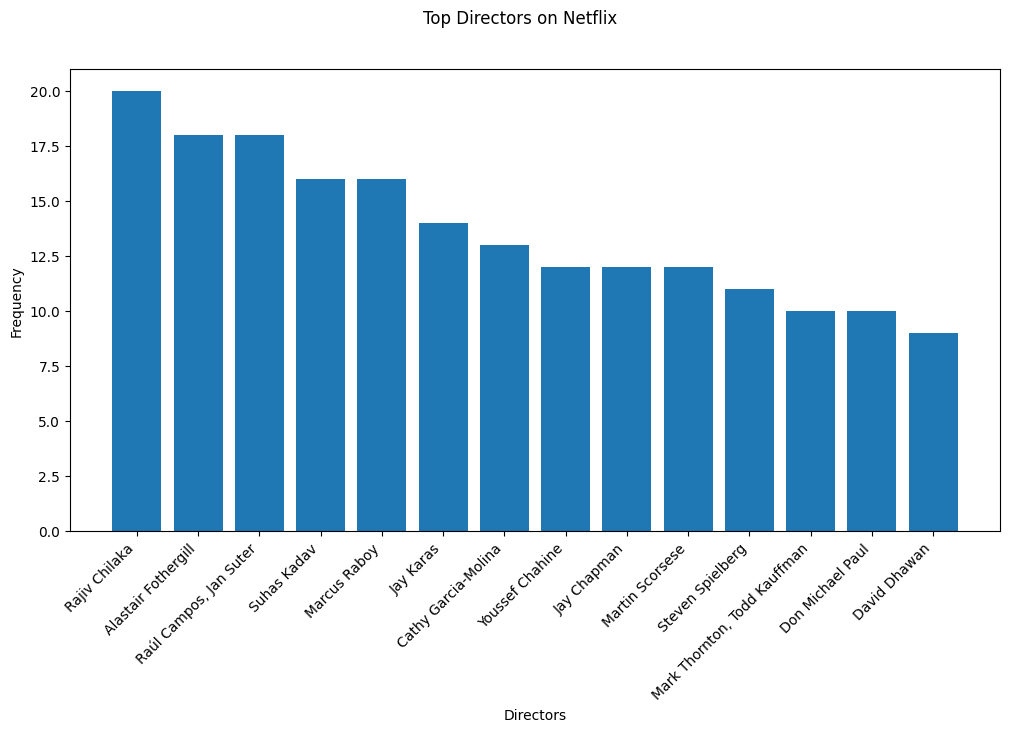

In [97]:
plt.figure(figsize=(12,6))
plt.bar(Top_directors['director'],Top_directors['count'])
plt.xticks(rotation=45 , ha='right')
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.suptitle('Top Directors on Netflix')
plt.show()